In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [40]:
all_data = pd.read_csv('dataset.csv')

In [52]:
test_data = all_data.loc[all_data.year == 2020]
train_data = all_data.loc[all_data.year < 2020]
dataset_2021 = all_data.loc[all_data.year == 2021]

# Break it into train and test data
X_train = train_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_train = train_data.loc[:, "score"]
X_test  = test_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_test = test_data.loc[:, "score"]

X_2021 = dataset_2021.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_2021 = dataset_2021.loc[:, "score"]

In [53]:
model = xgb.XGBRegressor(verbosity=1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [54]:
y_pred = model.predict(X_test)
test_data["Prediction"] = y_pred

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error:", rmse)

Root mean squared error: 7.49183015478353


/Users/trent.woodbury/Code/venvs/f1/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
<ipython-input-54-bb9e42f6d858>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prediction"] = y_pred


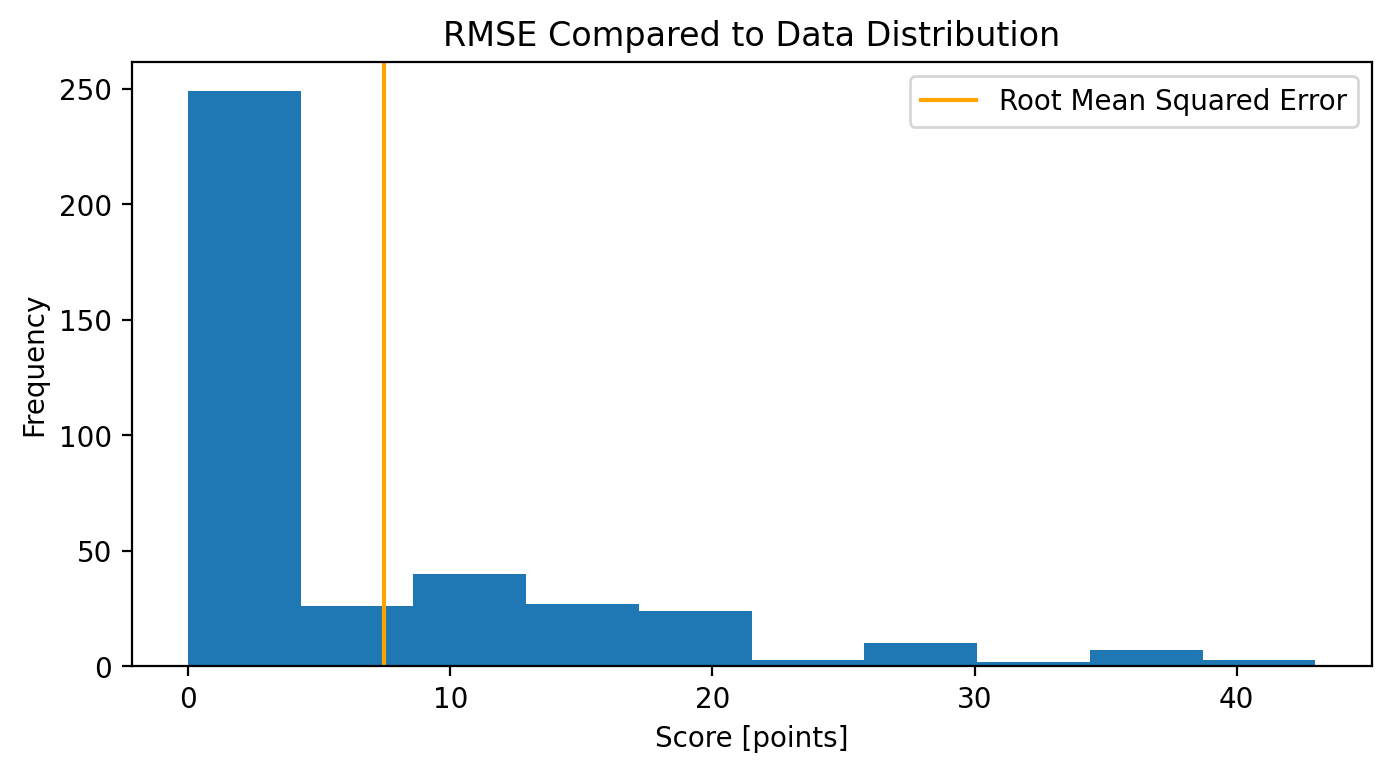

In [55]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (8,4)

plt.hist(y_test)
plt.axvline(rmse, color="orange", label="Root Mean Squared Error")
plt.xlabel("Score [points]")
plt.ylabel("Frequency")
plt.legend()
plt.title("RMSE Compared to Data Distribution")
plt.show()

In [56]:
test_data.sample(30)

,driver,race,race_1,race_2,race_3,race_4,last_year_tot,last_year_avg,last_year_std,same_race_last_year,score,year,Prediction
1608,Kimi Räikkönen,TUR,5,3,0,0,94.0,4.476190,3.763231,NaN,3,2020,6.295774
1621,Antonio Giovinazzi,RUS,0,0,0,0,26.0,1.238095,2.527939,0.0,3,2020,5.620230
1552,Sebastian Vettel,TUS,0,3,9,0,304.0,14.476190,9.790909,NaN,1,2020,7.848926
1702,Jack Aitken,ESP,0,0,0,0,NaN,NaN,NaN,NaN,0,2020,0.510912
1728,Pietro Fittipaldi,BHR,0,0,0,0,NaN,NaN,NaN,NaN,0,2020,0.510912
1390,Max Verstappen,ABU,0,26,11,0,364.0,17.333333,10.331183,21.0,38,2020,11.237308
1593,Nico Hülkenberg,SKH,0,0,0,0,51.0,2.428571,4.272838,NaN,0,2020,2.289681
1406,Sergio Pérez,SKH,3,21,11,9,100.0,4.761905,3.806636,NaN,28,2020,4.681835
1650,Romain Grosjean,70A,3,0,0,0,35.0,1.666667,2.265686,NaN,3,2020,5.262092
1479,Lando Norris,GBR,0,13,23,13,73.0,3.476190,3.802881,0.0,13,2020,3.002890


# 2021 Predictions

In [49]:
predictions_2021 = model.predict(X_2021)
dataset_2021["predictions"] = predictions_2021

<ipython-input-49-1d191a953f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2021["predictions"] = predictions_2021


In [57]:
dataset_2021.loc[dataset_2021.race == "BHR"]

,driver,race,race_1,race_2,race_3,race_4,last_year_tot,last_year_avg,last_year_std,same_race_last_year,score,year
1731,Lewis Hamilton,BHR,0,0,0,0,507.0,29.823529,12.284316,38.0,28,2021
1754,Max Verstappen,BHR,0,0,0,0,272.0,16.000000,12.041595,26.0,31,2021
1777,Valtteri Bottas,BHR,0,0,0,0,286.0,16.823529,11.086226,4.0,20,2021
1800,Lando Norris,BHR,0,0,0,0,132.0,7.764706,6.685146,15.0,15,2021
1823,Sergio Pérez,BHR,0,0,0,0,155.0,9.117647,7.991264,3.0,10,2021
1846,Charles Leclerc,BHR,0,0,0,0,128.0,7.529412,7.246703,4.0,11,2021
1869,Daniel Ricciardo,BHR,0,0,0,0,166.0,9.764706,6.476201,9.0,6,2021
1892,Carlos Sainz Jr.,BHR,0,0,0,0,133.0,7.823529,6.247352,10.0,7,2021
1915,Yuki Tsunoda,BHR,0,0,0,0,NaN,NaN,NaN,NaN,5,2021
1938,Lance Stroll,BHR,0,0,0,0,106.0,6.235294,6.638236,0.0,4,2021
